In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

path_dir = "drive/MyDrive/ICIC/02 Subtitle/Dataset/sub dataset/"
#path_dir = "drive/MyDrive/Bank Work/ICIC/02 Subtitle/Dataset/sub dataset/"
model_path = "drive/MyDrive/ICIC/02 Subtitle/Models/"
#model_path = "drive/MyDrive/Bank Work/ICIC/02 Subtitle/Models/"
path = 'drive/MyDrive/recog/Dataset/' 
#path = 'drive/MyDrive/Bank Work/recog/Dataset/' 

Xs = np.load(path_dir+"X_adjust.npy")
ys = np.load(path_dir+"Y.npy")

In [3]:
from skimage import transform

Xs2 = np.zeros((len(Xs), 64, 755, 3), np.float32)
for i in range(len(Xs)):
  Xs2[i] = transform.resize(Xs[i], (64, 755))
Xs = Xs2
Xs32 = np.zeros((len(Xs), 32, 379, 3), np.float32)
for i in range(len(Xs)):
  Xs32[i] = transform.resize(Xs[i], (32, 379))


In [4]:
image_sizes = np.load(path_dir+"Size.npy")

Xs.shape, ys.shape, image_sizes.shape

((4225, 64, 755, 3), (4225,), (4225, 2))

In [6]:

f=open(path+"list_char.txt", "r")
char_list = f.readline()
char_list = char_list.replace('x', '!')
char_list = char_list.replace('_', '')
char_list = char_list.replace('๚', '')
char_list = char_list.replace('ฤ', '')
char_list = char_list.replace('ฦ', '')
char_list = char_list.replace('+', '')
char_list = char_list.replace('/', '')
char_list = char_list.replace('–', '')
char_list = char_list.replace('ค', 'คฅ')
char_list += 'ํฤ'
char_list += "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789$฿&:?*'"

len(char_list)

157

In [7]:
from imutils.video import FPS
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np
from skimage import io, transform
# import the necessary packages
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np


def display(im3d, row_col = (6,6),   step=1, fig_size = (15, 10)):
    _, axes = plt.subplots(nrows=row_col[0], ncols=row_col[1], figsize=fig_size)

    vmin = im3d.min()
    vmax = im3d.max()

    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image,  vmin=vmin, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])



In [8]:
cs = []
for i in range(len(ys)):
    text = ys[i]
    for c in text:
        if c not in cs:
            cs.append(c)
len(cs)

all_characters = []
texts = ys.tolist()
for t in texts:
    for c in t:
        all_characters.append(c)

char_list,len(char_list), texts[:10], len(all_characters), len(set(all_characters))

(' "(),-.!กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮฯะัาำิีึืุูเแโใไๅๆ็่้๊๋์๐๑๒๓๔๕๖๗๘๙ํฤABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789$฿&:?*\'',
 157,
 ['Welcoming a newness that_s never been seen before',
  'YOU BE POPPIN_ LIKE A WHEELIE',
  'IN THE JEANS LIKE BILLIE',
  'Trick behind the mask, ridiculous Freak, A random Target born from growing animosity',
  'MELANIE MARTINEZ',
  'YOU_RE THE CHERRY PIECE',
  'THINK YOU FLY, BOY',
  'LIFE BECOMES A BETTER ONE',
  'ONCE I WAS 20 YEARS OLD',
  'and discovering that someone is waiting for me'],
 119904,
 148)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

random_state = 1
X_train_index_F, X_test_index, y_train, y_test = train_test_split(np.arange(Xs.shape[0]), texts, test_size=0.2, random_state=random_state)
X_train_index, X_val_index, y_train, y_val = train_test_split(X_train_index_F, y_train, test_size=1/8, random_state=random_state)
print(np.max(Xs[0]), X_train_index[:10], y_val[:10])
print(len(X_train_index_F),len(X_val_index), len(X_test_index))

0.9995445 [3971 1365 2938 3791 1214 2532 1754  616 1564 3572] ['ที่แหกคุกบางขวางได้', 'แค่เพียงมนุษย์', 'All the strokes draw out a sketch', 'ย้อนรอยสั่งตาย', 'A Millennium_s Wait for A Return', 'I HOPE I_LL SEE YOU LATER', 'ผมสังเกตเห็น', 'Having been through spring and fall, winter and summer', '102 ปี  ไข้หวัดสเปน', 'All traces are gone Can_t believe me']
3380 423 845


In [10]:
test_sizes = []
binIndexs = []
sized2s = []

for index in X_test_index:
#for index in np.arange(Xs.shape[0]):
  test_sizes.append(image_sizes[index][1])
  sized2s.append(image_sizes[index][1])

arr_sized2s = np.array(sized2s)
arg_index = np.argsort(arr_sized2s)
#Xs2 = np.load(path+"images_v2.npy")
len(X_test_index[arr_sized2s[arg_index[: int(len(X_test_index)*0.3)]]])

253

In [11]:
len(X_test_index) , len(X_train_index_F), len(X_train_index_F) + len(X_test_index), len(test_sizes)

(845, 3380, 4225, 845)

In [12]:
np_hist = np.array(test_sizes)
np_hist.mean(),np_hist.std()
hist,bin_edges = np.histogram(np_hist,bins=10)
hist,bin_edges, hist[0], sum(hist)

(array([ 76, 205, 226, 180,  95,  46,   3,   8,   4,   2]),
 array([  22. ,  248.1,  474.2,  700.3,  926.4, 1152.5, 1378.6, 1604.7,
        1830.8, 2056.9, 2283. ]),
 76,
 845)

In [13]:
binIndexs = []
for i in range(10):
  binIndexs.append([])

#for index in np.arange(Xs.shape[0]):
for index in X_test_index:
  for j in range( 1, len(bin_edges)):
    if image_sizes[index][1] <=  bin_edges[j]:
      binIndexs[j-1].append(index)
      break
N = 0
for i in range(10):
  N += len(binIndexs[i])
  print(i, len(binIndexs[i]))
N, len(X_test_index), len(binIndexs[0])

0 76
1 205
2 226
3 180
4 95
5 46
6 3
7 8
8 4
9 2


(845, 845, 76)

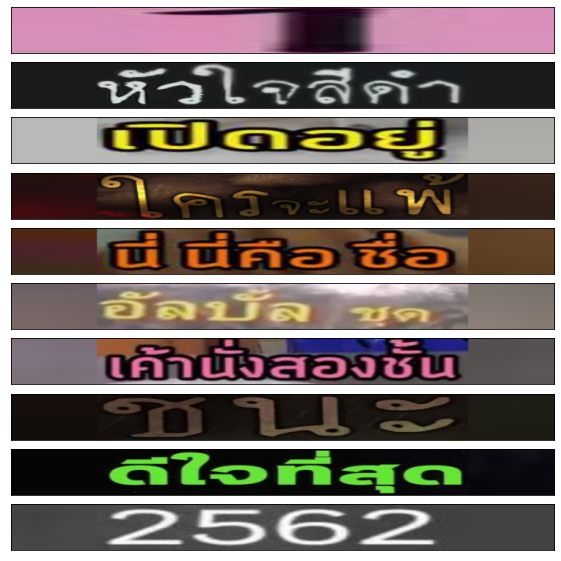

In [14]:
display(Xs[binIndexs[0][10:20]], row_col=(10,1))

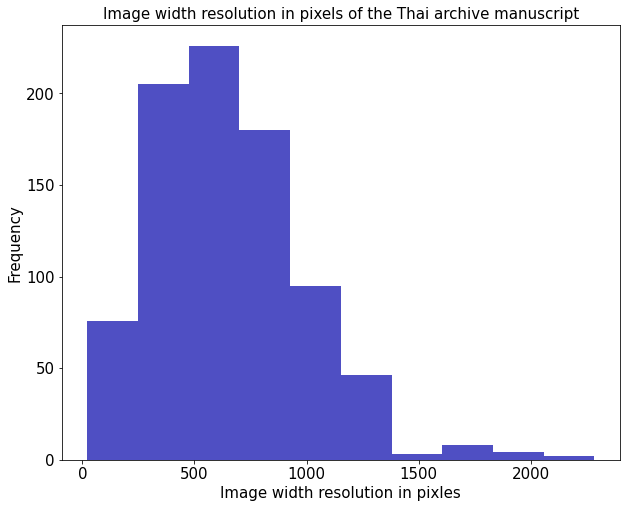

(<a list of 10 Patch objects>,
 array([  22. ,  248.1,  474.2,  700.3,  926.4, 1152.5, 1378.6, 1604.7,
        1830.8, 2056.9, 2283. ]))

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=np_hist, bins=10,cumulative=False, color='#0504aa',alpha=0.7, rwidth=1)
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Image width resolution in pixles',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Image width resolution in pixels of the test set',fontsize=15)
plt.title('Image width resolution in pixels of the Thai archive manuscript',fontsize=15)
 
plt.show()
patches,bins

In [16]:
from skimage import transform, color
from tensorflow.keras.preprocessing.sequence import pad_sequences

def encode_to_labels(txt, char_list):
    # encoding each output word into digits
    dig_lst = []
    for index, char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print(char)

    return dig_lst

def construct_training(Xs, ys, indexs, input_shape, ch=1):
    images = np.zeros((len(Xs),input_shape[0], input_shape[1], ch ))
    encode_padded_texts = []
    input_lengths = []
    max_lengths = []
    for ind in indexs:
        x = transform.resize(Xs[ind], (input_shape[0], input_shape[1]))
        if ch == 3:
            n_x = np.zeros((x.shape[0], x.shape[1], 3))
            x = x.reshape((x.shape[0], x.shape[1], x.shape[2]))
            #x = color.rgb2gray(x)
            n_x[:, :, 0] = x[:, :, 0]
            n_x[:, :, 1] = x[:, :, 1]
            n_x[:, :, 2] = x[:, :, 2]
            x = n_x
        images[ind] = n_x
        encode_padded_texts.append(encode_to_labels(ys[ind], char_list))
        input_lengths.append(max_label_len)
        max_lengths.append(len(ys[ind]))
  
        #print(len(ys[ind]) , max_label_len)

    padded_texts = pad_sequences(encode_padded_texts, maxlen=max_label_len, padding='post', value=len(char_list))

    return [np.array(images), padded_texts, np.array(input_lengths), np.array(max_lengths)]



In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
import numpy as np
import gc

from tensorflow.keras.utils import  Sequence


class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, Xs, ys, image_size, keras_image_generator=None , batch_size=32,
                 shuffle=True ,  list_IDs=None, ranged=1):
        'Initialization'
        if keras_image_generator is None:
            keras_image_generator =  ImageDataGenerator(rotation_range=0,
                               width_shift_range=0.0,
                               height_shift_range=0.0,
                               shear_range=0.00,
                               zoom_range=[1, 1],
                               horizontal_flip=False,
                               vertical_flip=False,
                               data_format='channels_last',
                               brightness_range=[1, 1])
        
        
        self.Xs = Xs
        self.ys =  np.zeros(len(ys))
        self.genImage = keras_image_generator
        self.batch_size = batch_size
        self.ranged = ranged

        
        self.labels = np.zeros(len(ys))
        self.list_IDs = list_IDs
        self.shuffle = shuffle
        self.on_epoch_end()
        self.image_size = image_size

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        #print("index",index)
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y =  self.Xs[0][list_IDs_temp], self.ys[list_IDs_temp]
        g_x = self.genImage.flow(X , y,   batch_size=X.shape[0], shuffle=False)
        #print(list_IDs_temp)
        X, y = next(g_x)

        devided = 255/self.ranged

        return { "image_input": X/devided, "the_labels":self.Xs[1][list_IDs_temp], 
                "input_length":self.Xs[2][list_IDs_temp],"label_length": self.Xs[3][list_IDs_temp]}, y
                #inputs, labels, input_length, label_length
    
   

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
     
        gc.collect()

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' 
        print('""""""""""__data_generation""""""""""""')
        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


In [18]:
#size = (64//1, int(496/62*93)+1, 1)
size = (32, 379, 3)
size = (32*2, 755, 3)
Xs.shape, size

texts = ys.tolist()
max_label_len = 0
for t in texts:
    max_label_len = max(max_label_len, len(t))
max_label_len, Xs.shape ,size

(93, (4225, 64, 755, 3), (64, 755, 3))

In [19]:
#max_label_len = 61
#Xs_groups = construct_training(Xs, texts, np.arange(len(texts)), (16, 100, 3), ch=3)
#np.max(Xs[0]), np.max(Xs_groups[0][0]), Xs[0].shape
Xs2.shape

(4225, 64, 755, 3)

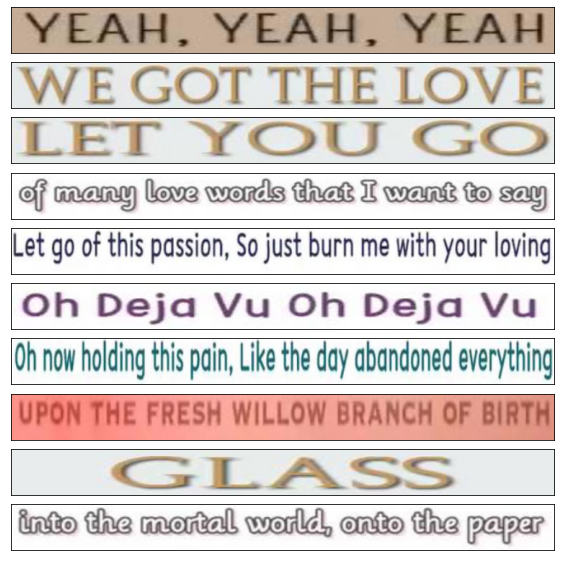

In [20]:
#Xs_groups[0] = Xs2
m = 200
display(Xs2[m:m+10], row_col=(10,1))

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from skimage import io

def show_most_simm(Xs, fig_row, fig_col, sz=20, show=True):
  
    plt.figure(figsize=(sz,sz))
    plt.imshow(Xs[0])
    for i in range(0, ((fig_row * fig_col)+1)):
        try:
            plt.axis('off')
            plt.subplot(fig_row, fig_col, i+1)   
            if len(Xs[i].shape) == 3:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1], Xs[i].shape[2])), cmap="gray")
            else:
                plt.imshow(Xs[i].reshape((Xs[i].shape[0], Xs[i].shape[1])), cmap="gray")
                
        except:
            print("Error")
            pass
    if show:
        plt.show()

image_gen_aug = ImageDataGenerator(rotation_range=0,
                               width_shift_range=0.0,
                               height_shift_range=0.0,
                               shear_range=0.0,
                               zoom_range=[1, 1],
                               horizontal_flip=False,
                               vertical_flip=False,
                               fill_mode='nearest',
                               data_format='channels_last')
                               #brightness_range=[0.5, 1.3])


image_gen_aug =  ImageDataGenerator(rotation_range=2,
                               width_shift_range=0.01,
                               height_shift_range=0.01,
                               shear_range=0.00,
                               zoom_range=[1, 1],
                               horizontal_flip=False,
                               vertical_flip=False,
                               data_format='channels_last',
                               brightness_range=[1, 1])

#image_gen_aug.rotation_range = 0
#image_gen_aug.width_shift_range = 0.05
image_gen_aug.height_shift_range = 0.3
#image_gen_aug.shear_range = 5
#image_gen_aug.zoom_range = [0.8, 1.2]
"""
dataGen = DataGenerator(Xs_groups, texts, image_size =size, 
                        keras_image_generator =image_gen_aug,  
                        list_IDs=X_train_index, shuffle=False)

Xs_as, ys_a = dataGen.__getitem__(0)

n=0
print(ys_a[:4])
show_most_simm(Xs_as["image_input"][:8], 2, 2, sz=10)
#show_most_simm(Xs[n:n+8], 4, 2, sz=10)
print(X_train_index[:10])
np.array(texts)[X_train_index][:3]
print(np.max(Xs_as["image_input"][0]), np.sum(Xs_as["image_input"][0]), 
      Xs_as["image_input"][0].shape[0]*Xs_as["image_input"][0].shape[1]*Xs_as["image_input"][0].shape[2])
np.max(Xs[0]), np.sum(Xs_as["image_input"][0]), Xs_as["image_input"][0].shape[0]*Xs_as["image_input"][0].shape[1]*Xs_as["image_input"][0].shape[2]
io.imshow(Xs_as["image_input"][0])
io.show()
"""

'\ndataGen = DataGenerator(Xs_groups, texts, image_size =size, \n                        keras_image_generator =image_gen_aug,  \n                        list_IDs=X_train_index, shuffle=False)\n\nXs_as, ys_a = dataGen.__getitem__(0)\n\nn=0\nprint(ys_a[:4])\nshow_most_simm(Xs_as["image_input"][:8], 2, 2, sz=10)\n#show_most_simm(Xs[n:n+8], 4, 2, sz=10)\nprint(X_train_index[:10])\nnp.array(texts)[X_train_index][:3]\nprint(np.max(Xs_as["image_input"][0]), np.sum(Xs_as["image_input"][0]), \n      Xs_as["image_input"][0].shape[0]*Xs_as["image_input"][0].shape[1]*Xs_as["image_input"][0].shape[2])\nnp.max(Xs[0]), np.sum(Xs_as["image_input"][0]), Xs_as["image_input"][0].shape[0]*Xs_as["image_input"][0].shape[1]*Xs_as["image_input"][0].shape[2]\nio.imshow(Xs_as["image_input"][0])\nio.show()\n'

In [23]:

ModelName = "ResNet"
RNN = 128
training_strategy = 'no_augment' #'online_aug+no_augment' 'iterative'
batch_size = 32
factor = 1
scale = "M"
size2 = (size[0], size[1], 3)
filepath=model_path+ModelName+"/"+scale+'_best_'+ModelName+'_Adam_'+str(RNN)+'xF'+str(factor)+"-"+str(batch_size)+ training_strategy+'_vgg.hdf5'
#np.max(Xs_as["image_input"][0]), np.max(Xs[0]), np.max(Xs_groups[0][0]), filepath

In [24]:
from tensorflow.keras import backend, layers, models

def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x


def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        strides: Strides for the first conv layer in the block.
    # Returns
        Output tensor for the block.
    Note that from stage 3,
    the first conv layer at main path is with strides=(2, 2)
    And the shortcut should have strides=(2, 2) as well
    """
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x


def mResNet50Conv(img_input, factor=4, strides=1):
    bn_axis = 3
   

    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    #x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    x = conv_block(x, 3, [64//factor, 64//factor, 256//factor], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64//factor, 64//factor, 256//factor], stage=2, block='b')
    x = identity_block(x, 3, [64//factor, 64//factor, 256//factor], stage=2, block='c')

    x = conv_block(x, 3, [128//factor, 128//factor, 512//factor], stage=3, block='a',  strides=(2, strides))
    x = identity_block(x, 3, [128//factor, 128//factor, 512//factor], stage=3, block='b')
    x = identity_block(x, 3, [128//factor, 128//factor, 512//factor], stage=3, block='c')
    x = identity_block(x, 3, [128//factor, 128//factor, 512//factor], stage=3, block='d')

    x = conv_block(x, 3, [256//factor, 256//factor, 1024//factor], stage=4, block='a', strides=(2, 1))
    #x = identity_block(x, 3, [256//factor, 256//factor, 1024//factor], stage=4, block='b')
    #x = identity_block(x, 3, [256//factor, 256//factor, 1024//factor], stage=4, block='c')
    #x = identity_block(x, 3, [256//factor, 256//factor, 1024//factor], stage=4, block='d')
    #x = identity_block(x, 3, [256//factor, 256//factor, 1024//factor], stage=4, block='e')
    #x = identity_block(x, 3, [256//factor, 256//factor, 1024//factor], stage=4, block='f')

    #x = conv_block(x, 3, [512//factor, 512//factor, 2048//factor], stage=5, block='a', strides=(2, 1))
    #x = identity_block(x, 3, [512//factor, 512//factor, 2048//factor], stage=5, block='b')
    #x = identity_block(x, 3, [512//factor, 512//factor, 2048//factor], stage=5, block='c')

    model = models.Model(img_input, x, name='resnet50')


    return model
img_input = layers.Input(shape=(64, 755, 3))
M = mResNet50Conv(img_input, factor=1, strides=2)
M.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 755, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 761, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 378, 64)  9472        ['conv1_pad[0][0]']              
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 32, 378, 64)  256         ['conv1[0][0]']           

In [25]:
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input,Conv1D, Conv2D, MaxPool2D, Lambda, Bidirectional,Flatten,AveragePooling2D, GlobalAveragePooling2D, GlobalAveragePooling1D
from tensorflow.keras.layers import Activation, add, Layer,LayerNormalization,Dropout,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import EfficientNetB1, DenseNet121

from tensorflow.keras.layers import Dense, GRU, LSTM, Reshape, BatchNormalization, Input,Conv1D, Conv2D, MaxPool2D, Lambda, Bidirectional,Flatten,AveragePooling2D, GlobalAveragePooling2D, GlobalAveragePooling1D
from tensorflow.keras.layers import Activation, add, ZeroPadding2D, MaxPooling2D,Concatenate,MultiHeadAttention
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.applications import EfficientNetB1, DenseNet121, ResNet50, VGG19, VGG16, MobileNetV2


def EfficientNetB1Transfer(input_shape, factor, transfer=True, time_step=512):
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    weights="imagenet"
    if not transfer:
        weights = None
        print("Not Transfer")
    print(inputs.get_shape( ))
    vgg = EfficientNetB1(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    vgg.summary()
    x = vgg.get_layer('block4a_expand_conv').output
    x = BatchNormalization()(x)
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    shape = x.get_shape()
    print(shape)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(8, 1))(x)

    shape = x.get_shape()
    print("A", shape)

    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs

def MobileNetTransfer(input_shape, factor, transfer=True, time_step=512):
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    weights="imagenet"
    if not transfer:
        weights = None
        print("Not Transfer")
    print(inputs.get_shape( ))
    vgg = MobileNetV2(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    vgg.summary()
    x = vgg.get_layer('block_6_expand').output
    x = BatchNormalization()(x)
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    shape = x.get_shape()
    print(shape)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(8, 1))(x)

    shape = x.get_shape()
    print("A", shape)

    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs



def VGG16Transfer(input_shape, factor, transfer=True, time_step=512):
     
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    weights="imagenet"
    if not transfer:
        weights = None
        print("Not Transfer")
    print(inputs.get_shape( ))
    vgg = VGG16(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    #vgg.summayr
    x = vgg.get_layer('block4_conv3').output
    x = BatchNormalization()(x)
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    shape = x.get_shape()
    print(shape)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(8, 1))(x)

    shape = x.get_shape()
    print("A", shape)

    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs

def VGG19Transfer(input_shape, factor, transfer=True, time_step=512):
     
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    weights="imagenet"
    if not transfer:
        weights = None
        print("Not Transfer")
    print(inputs.get_shape( ))
    vgg = VGG19(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    
    x = vgg.get_layer('block4_conv4').output
    x = BatchNormalization()(x)
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    shape = x.get_shape()
    print(shape)
    x = BatchNormalization()(x)
    x = AveragePooling2D(pool_size=(8, 1))(x)


    shape = x.get_shape()
    print("A", shape)
    

    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs

def ResNetTransfer(input_shape, factor, transfer=True, time_step = 512):
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    weights="imagenet"
    if not transfer:
        weights = None
        print("Not Transfer")
    print(inputs.get_shape( ), "Transfer", transfer)
    reseNet = ResNet50(include_top=False, weights=weights,  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    #reseNet.summary()
    x = reseNet.get_layer('conv3_block4_out').output
    x = BatchNormalization()(x)
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    shape = x.get_shape()
    print(shape)
    x = AveragePooling2D(pool_size=(8, 1))(x)
    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs

def DenseConv(input_shape, factor):
    inputs = Input(shape=input_shape, name="image_input")
    denet121_repeat = [6, 12, 24, 16]
    bn_axis = 3
    x = ZeroPadding2D(padding=((3, 3), (3, 3)))(inputs)
    x = Conv2D(64, 7, strides=2, use_bias=False, name='conv1/conv')(x)
    x = BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='conv1/bn')(x)
    x = Activation('relu', name='conv1/relu')(x)
    x = ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
    x = MaxPooling2D(3, strides=2, name='pool1', padding='same')(x)

    shape = x.get_shape()
    print("B", shape)

    x = dense_block(x, denet121_repeat[0], name='conv2')
    shape = x.get_shape()
    print("C1", shape)
    x = transition_block(x, 0.5, name='pool2', strides=(2,2))
    x = dense_block(x, denet121_repeat[1], name='conv3')
    x = transition_block(x, 0.5, name='pool3', strides=(2,1))
    shape = x.get_shape()
    print("C2", shape)
    x = dense_block(x, denet121_repeat[2], name='conv4')
    x = transition_block(x, 0.5, name='pool4', strides=(2,1))
    shape = x.get_shape()
    print("C2", shape)
    x = dense_block(x, denet121_repeat[3], name='conv5')
    #print("B", Conv_Shape)
    x = AveragePooling2D(pool_size=(2, 1))(x)
    Conv_Shape = x.get_shape( )
    #print("C", Conv_Shape)
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x,inputs


def DenseNet(input_shape, factor, transfer=True, time_step=512):
     
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    weights="imagenet"
    if not transfer:
        weights = None
        print("Not Transfer")
    denseNet = DenseNet121(include_top=False, weights=weights,  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    x = denseNet.get_layer('pool3_conv').output
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    shape = x.get_shape()
    print(shape)
    x = AveragePooling2D(pool_size=(8, 1))(x)

    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs



def mResNet(input_shape, factor, time_step=1024, type_conv=1):
    inputs = Input(shape=input_shape, name="image_input")
    x = mResNet50Conv(inputs, factor,strides=type_conv ).output
    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    Conv_Shape = x.get_shape( )

    x = AveragePooling2D(pool_size=(Conv_Shape[1], 1))(x)
    
    x = Reshape( target_shape=(Conv_Shape[2] ,Conv_Shape[3]), name='Reshape' )(x)
    return x,inputs


def mVGG(input_shape, factor, time_step=1024, stride_type=1):
   
    inputs = Input(shape=input_shape, name="image_input")
    # convolution layer with kernel size (3,3)
    # convolution layer with kernel size (3,3)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(stride_type, stride_type) , padding='same')(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(stride_type, 1), padding='same')(x)


    x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    Conv_Shape = x.get_shape( )

    x = AveragePooling2D(pool_size=(Conv_Shape[1], 1))(x)
    
    x = Reshape( target_shape=(Conv_Shape[2] ,Conv_Shape[3]), name='Reshape' )(x)
    return x,inputs




def Rapeeporn(input_shape, factor=1, isConv1=False, time_step=64, type_64 = False):
    inputs = Input(shape=input_shape, name="image_input")
    # convolution layer with kernel size (3,3)
    # convolution layer with kernel size (3,3)
    x = Conv2D(16*factor, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(32*factor, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)
    
    x = Conv2D(64*factor, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    if type_64:
      x = MaxPool2D(pool_size=(2, 2), strides=(2, 2),  padding='same')(x)
    else:
      x = MaxPool2D(pool_size=(2, 2), strides=(2, 1),  padding='same')(x)
    
    if isConv1:
        x = Conv2D(time_step, (1, 1), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
    
    Conv_Shape = x.get_shape( )
    x = AveragePooling2D(pool_size=(Conv_Shape[1], 1))(x)
    x = Reshape( target_shape=(Conv_Shape[2] ,Conv_Shape[3]), name='Reshape' )(x)
    return x,inputs

def DenseNetConv(input_shape, factor, scale="S"):
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    denseNet = DenseNet121(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    shape = denseNet.outputs[0].get_shape()
    print(shape)
    x = Reshape( target_shape=(shape[1], 1), name='Reshape1' )(denseNet.outputs[0])
    print(x.get_shape( ))
    x = Conv1D(62, 3, 1, padding='same')(x)
    print(x.get_shape( ))
    x = Reshape( target_shape=(62 ,1024), name='Reshape2' )(x)
    return x, inputs


def EfficientNetCov(input_shape, factor, scale="S"):
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    denseNet = EfficientNetB1(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    shape = denseNet.outputs[0].get_shape()
    print(shape)
    x = Reshape( target_shape=( shape[1], 1), name='Reshape1' )(denseNet.outputs[0])
    print(x.get_shape( ))
    x = Conv1D(62, 3, 1, padding='same')(x)
    x = Reshape( target_shape=(62 ,1280), name='Reshape2' )(x)
    x = Conv1D(512, 3, 1, padding='same')(x)
    return x, inputs



def EfficientNetCov2(input_shape, factor, scale="S"):
     
    inputs = Input(shape=input_shape, name="image_input")
    print(inputs.get_shape( ))
    net = EfficientNetB1(include_top=False, weights="imagenet",  input_tensor=inputs,  input_shape=inputs.get_shape( )[1:],    pooling='avg',  )
    #net.summary()
    x = net.get_layer('block4a_expand_conv').output
    x= Conv2D(512, 1, padding='same')(x)
    shape = x.get_shape()
    print(shape)
    x = AveragePooling2D(pool_size=(8, 1))(x)

    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x, inputs
def mVGG64(input_shape, factor):
    inputs = Input(shape=input_shape, name="image_input")
    # convolution layer with kernel size (3,3)
    # convolution layer with kernel size (3,3)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 2) , padding='same')(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(2, 2), strides=(2, 1), padding='same')(x)


    Conv_Shape = x.get_shape( )
    x = AveragePooling2D(pool_size=(Conv_Shape[1], 1))(x)
    Conv_Shape = x.get_shape( )
    x = Reshape( target_shape=(Conv_Shape[2] ,int(Conv_Shape[1]*Conv_Shape[3])), name='Reshape' )(x)
    return x,inputs

input_shape = (32, 379, 3)
input_shape = (64, 755, 3)
x, inputs = Rapeeporn(input_shape,1, False, time_step=64, type_64 = True)
m = Model(inputs, x)
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 755, 3)]      0         
                                                                 
 conv2d (Conv2D)             (None, 64, 755, 16)       448       
                                                                 
 batch_normalization (BatchN  (None, 64, 755, 16)      64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 377, 16)      0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 377, 32)       4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 377, 32)      128   

In [26]:
def createNet(input_shape, factor, scale="S", model="DenseNet", RNN=128, extra="Transfer", rnn_type="LSTM", time_step=512):
    #inputs = Input(shape=input_shape, name="image_input")
    #print(inputs.get_shape( ))
    if model == "mVGG64" and "Construct" in extra  :
         x, inputs = mVGG(input_shape,factor, time_step, 2)
    if model == "mResNet64" and "Construct" in extra  :
        print("time_step", time_step)
        x, inputs = mResNet(input_shape, factor, time_step=time_step, type_conv=2)
    if model == "mResNet" and "Construct" in extra  :
         x, inputs = mResNet(input_shape, factor, time_step=time_step, type_conv=1)
    if model == "mVGG" and "Construct" in extra  :
         x, inputs = mVGG(input_shape,factor, time_step, 1)
    if model == "DenseNet" and "Construct" in extra  : 
        x, inputs = DenseNet(input_shape, factor, transfer = False, time_step=time_step)
    elif model == "DenseNet" and "Transfer" in extra : 
        print("DenseNet Transfer")
        x, inputs = DenseNet(input_shape, factor, time_step=time_step)
    elif model == "Rapeeporn" and "Conv1x1" in extra and ('64' in extra or '512' in extra):
        x, inputs = Rapeeporn(input_shape,1, False, time_step=64, type_64 = False)
    elif model == "mRapeeporn64"  :
        x, inputs = Rapeeporn(input_shape,1, False, time_step=64, type_64 = True)
    elif model == "Rapeeporn"  :
        x, inputs = Rapeeporn(input_shape, isConv1 = False)
    elif model == "EfficientNet" and "Transfer" in extra :
        x, inputs = EfficientNetB1Transfer(input_shape, factor, transfer = True, time_step=time_step)
    elif model == "EfficientNet" and "Construct" in extra :
        x, inputs = EfficientNetB1Transfer(input_shape, factor, transfer = False, time_step=time_step)
    elif model == "VGG" and "Transfer" in extra and "16" in extra:
        x, inputs = VGG16Transfer(input_shape, factor, transfer = True, time_step=time_step)
    elif model == "VGG" and "Construct" in extra and "16" in extra :
        x, inputs = VGG16Transfer(input_shape, factor, transfer = False, time_step=time_step)
    elif model == "VGG" and "Transfer" in extra and "19" in extra:
        x, inputs = VGG19Transfer(input_shape, factor, transfer = True, time_step=time_step)
    elif model == "VGG" and "Construct" in extra and "19" in extra :
        x, inputs = VGG19Transfer(input_shape, factor, transfer = False, time_step=time_step)
    elif model == "ResNet" and  "Construct" in extra  :
        x, inputs = ResNetTransfer(input_shape, factor, transfer = False, time_step=time_step)
    elif model == "ResNet" and  "Transfer" in extra:
        x, inputs = ResNetTransfer(input_shape, factor, transfer = True, time_step=time_step)
    elif model == "MobileNet" and "Transfer" in extra :
        x, inputs = MobileNetTransfer(input_shape, factor, transfer = True, time_step=time_step)
    elif model == "MobileNet" and "Construct" in extra :
        x, inputs = MobileNetTransfer(input_shape, factor, transfer = False, time_step=time_step)
    elif model == "VGG" and scale == "S" and "Construct" in extra  :
        x, inputs = VGGS(input_shape, factor)
    elif model == "VGG" and scale == "M" and "Construct" in extra :
        x, inputs = VGGM(input_shape, factor)
    elif model == "VGG" and scale == "L" and "Construct" in extra  :
        x, inputs = VGGL(input_shape, factor)
    elif model == "ResNet" and scale == "M" and extra == "Construct":
        x, inputs = ResNetM(input_shape, factor)
    elif model == "ResNet" and scale == "L" and extra == "Construct":
        x, inputs = ResNetL(input_shape, factor)
    elif model == "ResNet" and  extra == "Construct":
        x, inputs = ResNetTransfer(input_shape, factor, transfer = False, time_step=time_step)
    elif  model == "ResNet" and  "Construct" in extra : 
        x, inputs = ResNetTransfer(input_shape, factor, time_step=time_step)
    elif  model == "VGG19"  and "Transfer" in extra: 
        x, inputs = VGGTransfer(input_shape, factor)
    elif  model == "VGG16"  and "Transfer" in extra: 
        x, inputs = VGG16Transfer(input_shape, factor)
    

    

    print(x.get_shape( ))
    # bidirectional LSTM layers with units=128
    #x = GlobalAveragePooling1D()(x)
    #x = Flatten()(x)
    #embed_dim, num_heads, ff_dim
    embed_dim = x.get_shape()[1]
    ff_dim = embed_dim
    #num_heads = x.get_shape( )[2]
    #print(embed_dim, num_heads, ff_dim)
    embed_dim = 32
    ff_dim = 32
    num_heads = 2
   
    if rnn_type == "LSTM":
        x = Bidirectional( LSTM( RNN, return_sequences=True, dropout=0.25 ), name='LSTM_1' )(x)
        x = Bidirectional( LSTM( RNN, return_sequences=True, dropout=0.25 ), name='LSTM_2' )(x)
    else:
        x = Bidirectional( GRU( RNN, return_sequences=True, dropout=0.25 ), name='GRU_1' )(x)
        x = Bidirectional( GRU( RNN, return_sequences=True, dropout=0.25 ), name='GRU_2' )(x)


    outputs = Dense(len(char_list)+1, activation='softmax')(x)

    # model to be used at test time
    act_model = Model(inputs, outputs)

    # act_model.summary()
    return act_model, inputs, outputs

def createModel(modelname, input_size, factor, scale, rnn_size , extra, rnn_type, optimizetype, lr=0.001, time_step=512):
    act_model, inputs, outputs= createNet(input_shape=input_size, factor=factor, scale=scale, model=modelname, RNN=rnn_size, extra=extra, rnn_type=rnn_type,
                                          time_step=time_step)

    #act_model.summary()
    labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')

    def ctc_lambda_func(args):
        y_pred, labels, input_length, label_length = args
        return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
    
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])
    model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

    # model to be used at training time
    model = Model(inputs=[inputs, labels, input_length,
                        label_length], outputs=loss_out)
    if scale == 'S':
        lr = 0.001

    def get_lr_metric(optimizer):
        def lr(y_true, y_pred):
            return optimizer.lr
        return lr

    if optimizetype == "SGD":
        optimizer = SGD(learning_rate=lr, momentum=0.9, decay = 0.0001)
    elif optimizetype == "Adam":
        optimizer = Adam(learning_rate=lr)
    elif optimizetype == "RMSprop":
        optimizer = RMSprop(learning_rate=lr)
    lr_metric = get_lr_metric(optimizer)
    
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred},  metrics=['accuracy', lr_metric], optimizer = optimizer)
    return model, act_model


In [27]:
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

def random_distribute(xi, wi):
    cul =  wi.cumsum()/wi.sum()
    r = np.random.rand()
    #print(r, cul)
    for i in range(len(xi)):
        if r < cul[i]:
            return xi[i], i, r
    return  xi[len(xi) - 1], len(xi) - 1, r 

def update_weight(wi, i, value, expi):
    valuei = expi*value
    hsize = valuei.shape[0]//2
    start_i = i - hsize
    end_i = i + hsize+1
    value_start = 0
    value_end = valuei.shape[0]
    if i < hsize:
        start_i = 0
        value_start = hsize-i
    elif  i + hsize >= wi.shape[0]:
        end_i =  wi.shape[0]
        value_end = hsize + (wi.shape[0] -i)
    #print(wi[start_i:end_i].shape, valuei[value_start:value_end].shape)
    wii = np.copy(wi)
    wii[start_i:end_i] += valuei[value_start:value_end]
    return wii

def adjust_weights(wi, delta):
    avg_mean = np.mean(wi)
    w2 = np.copy(wi)
    deltawi = wi-avg_mean;
    return  wi + deltawi*0.5*delta


def adaptive_linear(custom):
    custom.w = (custom.maxRepeat - custom.repeat_time)/custom.maxRepeat

import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

def adaptive_sigmoid(custom):
    custom.w = 1-sigmoid((custom.repeat_time-custom.maxRepeat/2)*0.1)

def cycle_sigmoid(custom):
    custom.w  = 1-sigmoid((custom.repeat_time%custom.step-(custom.step//2))*0.5)

def cycle_linear(custom):
    custom.w = (custom.step - custom.repeat_time%custom.step)/custom.step

def constant(x):
    custom.w = 1

class CustomCallback(Callback):
  
    def __init__(self, callbakAug, model, func=adaptive_linear, ismixed=True):
        self.callbakAug = callbakAug
        self.NSample = 100
        self.xi = np.arange(0, 1.00000001, 1/self.NSample)
        NN = 6
        self.NN = NN
        self.xwi = np.arange(NN)
        self.func = func
        self.ismixed = ismixed
        self.model = model
        self.idx = 0
        self.idxa = 0

        self.wim = np.ones(NN)
        self.wis = []
        self.idxs = []
        self.scales = []
        for i in range(NN):
            self.wis.append(np.ones(self.NSample+1))
            self.idxs.append([])
            self.scales.append(0.5)
        #x, self.idxa, 1 = random_distribute(self.xwi, self.wim)
        x, self.idxa, r = random_distribute(self.xwi, self.wim)
        x, self.idx, r = random_distribute(self.xi, self.wis[self.idxa])
        self.scales[self.idxa] = self.idx/self.NSample

        self.baseValues = []

        a = 0.2
        hsize = 15
        window_size = 2*hsize+1
        dd = 4
        step = dd/hsize
        xxi = np.arange(-dd, dd+step,step )
        yyi = norm.pdf(xxi, 0, 1)
        self.yyi = yyi/np.max(yyi)
        plt.plot(xxi, yyi)
        plt.show()

        self.Vallosses = [];
        self.avgValloss = 0


        self.state_aug = True;
        self.repeat_time = 0
        self.maxRepeat =200
        self.bestLoss = 0
        self.w = 0
        self.cycle = 5
        self.step = self.maxRepeat//self.cycle


    def on_epoch_end(self, epoch, logs=None):
        self.func(self)
        w = self.w

        if self.state_aug == True:
            colors ='rgbcmy'
            for j in range(self.NN):
                ids = np.where(self.wis[j] <= 0)
                self.wis[j][ids] = 0.1
                plt.plot(self.xi, self.wis[j]/np.max(self.wis[j]), color=colors[j])

            

            if len(self.Vallosses) != 0:
                minloss = min(self.Vallosses)
                delta = (self.Vallosses[-1] - logs['val_loss'])/(sum(self.Vallosses)/len(self.Vallosses))
                if abs(delta) >= 0.5:
                    delta = delta*0.5/abs(delta)

                for j in range(self.NN):
                    self.wis[j] = adjust_weights( self.wis[j], delta*2)
                print("adjust by val loss", delta, logs['val_loss'], minloss, self.Vallosses[-1],self.scales )
                #self.wi = adjust_weights( self.wim, delta*2)

                for j in range(self.NN):
                    plt.plot(self.xi, self.wis[j]/np.max(self.wis[j]), color=colors[j],linestyle='dashed')

                plt.show()

                ids = np.where(self.wim <= 0)
                self.wim[ids] = 0.1
                plt.plot(self.xwi, self.wim/np.max(self.wim), color=colors[j])

                plt.show()


       
        if self.bestLoss == 0:
            self.bestLoss = logs['val_loss']
        
        if self.bestLoss > logs['val_loss']:
            #self.repeat_time = 0
            self.bestLoss = logs['val_loss']
        else:
            pass
        
        if self.repeat_time % (self.step//2) == 0:
            print("Reset State")
            self.model.reset_states()

        
            #self.repeat_time += 1
        self.repeat_time += 1
        print("Repeat:", self.repeat_time, self.state_aug, self.w)
        if self.repeat_time > self.maxRepeat:
            self.repeat_time = 0
            if self.state_aug:
                self.maxRepeat = 20
            else:
                self.maxRepeat = 20
            self.state_aug = not self.state_aug 

        self.Vallosses.append(logs['val_loss'])

        
        self.baseValues =  [sum(self.baseValues)/len(self.baseValues)]

        


    def clamp(self, wi):
        scale =np.max(wi) -  np.min(wi) 
        wi = wi- np.min(wi)+0.01

        return wi/np.max(wi)

   
    def on_train_batch_end(self, batch, logs=None):
        if self.state_aug == False:
            return
        loss = logs["loss"]
        w = self.w

        lastloss = loss
        minloss= loss
        if len(self.baseValues) != 0:
            lastloss = self.baseValues[-1]
            minloss= min(self.baseValues)
        avgloss = loss
        if len(self.baseValues) != 0:
            avgloss= sum(self.baseValues)/len(self.baseValues)
        delta = (lastloss - loss)/avgloss
        if delta > 0:
            delta *= 1
        if self.ismixed:
            self.wis[self.idxa] = update_weight(self.wis[self.idxa], self.idx, delta*0.25, self.yyi)
            self.wim[self.idxa] += delta


        self.callbakAug.rotation_range = (0.00 + self.scales[0]*10)*w
        self.callbakAug.shear_range = (0.00 + self.scales[1]*10)*w
        self.callbakAug.zoom_range = [1-0.5*self.scales[2]*w, 1+0.5*self.scales[3]*w]
        self.callbakAug.width_shift_range = (0.00 + self.scales[4]*0.1*w)
        self.callbakAug.height_shift_range = (0.00 + self.scales[5]*0.4*w)

        x, self.idxa, r = random_distribute(self.xwi, self.wim)
        x, self.idx, r = random_distribute(self.xi, self.wis[self.idxa])
        self.scales[self.idxa] = self.idx/self.NSample
        #print(self.scales, self.idxa)

        self.baseValues.append(loss)



In [28]:
def generate_epochs(epoch, t):
    x  = epoch
    epochs = []
    while x > t:
        epochs.append(t)
        x = x - t

    if x > 0:
        if len(epochs) % 2 == 0:
            epochs[len(epochs) - 1] += x
        else:
            epochs.append(x)
    return epochs


print(generate_epochs(200, 100))
print(generate_epochs(200, 50))
#print(generate_epochs(200, 40))
print(generate_epochs(200, 30))
print(generate_epochs(200, 25))
print(generate_epochs(200, 20))
print(generate_epochs(200, 15))
print(generate_epochs(200, 10))



[100, 100]
[50, 50, 50, 50]
[30, 30, 30, 30, 30, 50]
[25, 25, 25, 25, 25, 25, 25, 25]
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 5]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [29]:
import pandas as pd

epochs = 100

#image_gen_aug

from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch, lr):
   initial_lrate = 0.001
   epochs_per_cycle = 20
   cos_inner = (math.pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
   
   nlr = max(initial_lrate/2 * (math.cos(cos_inner) + 1), 0.0001)
   print(lr, nlr)
   return lr

   #return lrate

lrate = LearningRateScheduler(step_decay)



def train_model(model, act_model, filepath, epochs, training_strategy, N_period, max_aug = 0.2):
    checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    


    callbacks_list = [checkpoint, lrate]
    isMixed = False
    if 'mixed' in filepath:
        isMixed = True
    func = adaptive_linear
    if 'adaptive' in filepath:
        if 'sigmoid' in filepath:
            if 'cycle' in filepath:
                func = cycle_sigmoid
            else:
                func = adaptive_sigmoid
        if 'linear' in filepath:
            if 'cycle' in filepath:
                func = cycle_linear
            else:
                func = adaptive_sigmoid
    
        callbakAug =  CustomCallback(dataGenTrain, model = model,func=func,ismixed=isMixed)
        callbacks_list2 = [checkpoint, lrate, callbakAug]
    else:
        callbacks_list2 = callbacks_list
    step = 0


    if "Transferx" in filepath:
        for i in range(len(model.layers)):
            if i > len(model.layers) - 8:
                model.layers[i].trainable = True
            else:
                model.layers[i].trainable = False
        model.fit_generator(no_aug_dataGenTrain,  epochs=20, validation_data=dataGenValid, verbose=1, callbacks=callbacks_list)
        for i in range(len(model.layers)):
            if i > len(model.layers) - 8:
                model.layers[i].trainable = True
            else:
                model.layers[i].trainable = True

    if "Transfer" in filepath:
      if "Freeze" in filepath:
        for i in range(len(act_model.layers) - 8):
          act_model.layers[i].trainable = False

    if training_strategy == 'no_augment':
        history = model.fit_generator(no_aug_dataGenTrain,  epochs=epochs, validation_data=dataGenValid, verbose=1, callbacks=callbacks_list)
        hist_df = pd.DataFrame(history.history)
    elif training_strategy == 'online_aug':
        history = model.fit_generator(no_aug_dataGenTrain,  epochs=epochs, validation_data=dataGenValid, verbose=1, callbacks=callbacks_list2)
        hist_df = pd.DataFrame(history.history)
    elif training_strategy == 'online_aug+no_augment':
        history1 = model.fit_generator(dataGenTrain,  epochs=epochs//2, validation_data=dataGenValid, verbose=1, callbacks=callbacks_list2)
        history2 = model.fit_generator(no_aug_dataGenTrain,  epochs=epochs//2, validation_data=dataGenValid, verbose=1, callbacks=callbacks_list)
        df1 = pd.DataFrame(history1.history)
        df2 = pd.DataFrame(history2.history)

        hist_df = pd.concat([df1, df2])
    elif 'iterative' in training_strategy:
        print("Eneter Iterative Training:", training_strategy)
        dataGenTrain1 =  dataGenTrain
        dataGenTrain2 = no_aug_dataGenTrain
        if "no_augment" in training_strategy:
            dataGenTrain1 = no_aug_dataGenTrain
        elif "all_augment" in training_strategy:
            dataGenTrain2 = dataGenTrain

        eps = generate_epochs(epochs, N_period)
        M = len(eps)
        print(eps)
        total = 0
        L = len(act_model.layers)
        base_aug = 0.2
        
        for i in range(0, M, 2):
            ML = L-8
            if "It_unlock" in filepath:
              for j in range( ML - int(ML*i/(M-1))  , ML):
                print(j, end=" ")
                act_model.layers[j].trainable = True
              print()
            if "increase_aug" in filepath:
                base_aug + (max_aug - base_aug)*i/(M-2)
                scale_n = base_aug
                image_gen_aug.rotation_range = 0.5 + scale_n*10
                image_gen_aug.shear_range = 0.5 + scale_n*10
                image_gen_aug.zoom_range = [1-0.5*scale_n, 1+0.5*scale_n]
                image_gen_aug.width_shift_range = 0.005 + scale_n*0.1
                image_gen_aug.height_shift_range = 0.005 + scale_n*0.4
                print("Base aug", base_aug)
                

            #ep = eps[i]
            #K.set_value(model.optimizer.learning_rate, 0.001)
            history1 = model.fit_generator(dataGenTrain1,  epochs=eps[i], validation_data=dataGenValid, verbose=1, callbacks=callbacks_list2)
            total += eps[i]
            print("Real Epoch", total)
            #act_model.load_weights(filepath)
            #K.set_value(model.optimizer.learning_rate, 0.001)
            history2 = model.fit_generator(dataGenTrain2,  epochs=eps[i + 1], validation_data=dataGenValid, verbose=1, callbacks=callbacks_list)
            #act_model.load_weights(filepath)
            df1 = pd.DataFrame(history1.history)
            df2 = pd.DataFrame(history2.history)
            if i == 0:
                hist_df = pd.concat([df1, df2])
            hist_df = pd.concat([hist_df, df1, df2])
            total += eps[i + 1]
            print("Real Epoch", total)
    
    elif training_strategy == 'iterative2':
        M = 5
        ep = epochs//(M)
        #eps = [30, 30, 30, 30, 30]
        for i in range(M):
            history1 = model.fit_generator(dataGenTrain,  epochs=ep, validation_data=dataGenValid, verbose=1, callbacks=callbacks_list2)
            df1 = pd.DataFrame(history1.history)

            if i == 0:
                hist_df = df1
            hist_df = pd.concat([hist_df, df1])
    #hist_df = pd.DataFrame(history.history) 
    hist_df.to_csv(filepath.replace("hdf5", "csv"))
    act_model.save_weights(filepath.replace("best", "last"))




In [30]:
fold = -1
modelname = "mVGG64"
rnn_size = 256
rnn_type = "LSTM"
time_step = 512
input_size = (64, 755, 3) #(32, 379, 3)
add_extras = "_ODS_"
add_extras = ""
max_aug = 0.4
extra_name_base = "Construct_increase_aug_graph"+str(max_aug)
N_preiod = 20
optimizer = "Adam"
training_strategy = 'no_augment' #online_aug+no_augment #iterative
scale = "T"
ranged=1
factor =1
batch_size = 32
extra_name = extra_name_base +""+str(fold+1) +"" + add_extras + "time_step" + str(time_step) + "N_preiod" + str(N_preiod)

filepath=model_path+modelname+"/"+scale+'_best_'+modelname+extra_name+'_'+rnn_type+optimizer+'_'+\
        str(rnn_size)+'xF'+str(factor)+"-"+str(batch_size)+ training_strategy+'_vgg.hdf5'
print(filepath)
model, act_model1 = createModel(modelname, input_size, factor, scale, rnn_size, extra_name,rnn_type, optimizer,time_step = time_step)
act_model1.load_weights(filepath)
act_model1.summary()

drive/MyDrive/ICIC/02 Subtitle/Models/mVGG64/T_best_mVGG64Construct_increase_aug_graph0.40time_step512N_preiod20_LSTMAdam_256xF1-32no_augment_vgg.hdf5
(None, 94, 512)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 755, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 755, 64)       1792      
                                                                 
 batch_normalization_3 (Batc  (None, 64, 755, 64)      256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 755, 64)       36928     
                                                                 
 batch_normalization_4 (Batc  (None, 64, 755, 64)      256       
 hNormalization)        

In [31]:
fold = -1
modelname = "mVGG"
rnn_size = 256
rnn_type = "LSTM"
time_step = 512
input_size = (32, 379, 3) #(32, 379, 3
max_aug = 0.4
extra_name_base = "Construct_increase_aug_graph"+str(max_aug)
N_preiod = 20
optimizer = "Adam"
training_strategy = 'no_augment' #online_aug+no_augment #iterative
scale = "T"
ranged=1
factor =1
batch_size = 32
extra_name = extra_name_base +""+str(fold+1) +"" + add_extras + "time_step" + str(time_step) + "N_preiod" + str(N_preiod)

filepath=model_path+modelname+"/"+scale+'_best_'+modelname+extra_name+'_'+rnn_type+optimizer+'_'+\
        str(rnn_size)+'xF'+str(factor)+"-"+str(batch_size)+ training_strategy+'_vgg.hdf5'
print(filepath)
model, act_model2 = createModel(modelname, input_size, factor, scale, rnn_size, extra_name,rnn_type, optimizer,time_step = time_step)
act_model2.load_weights(filepath)
act_model2.summary()

drive/MyDrive/ICIC/02 Subtitle/Models/mVGG/T_best_mVGGConstruct_increase_aug_graph0.40time_step512N_preiod20_LSTMAdam_256xF1-32no_augment_vgg.hdf5
(None, 94, 512)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 32, 379, 3)]      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 379, 64)       1792      
                                                                 
 batch_normalization_14 (Bat  (None, 32, 379, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 379, 64)       36928     
                                                                 
 batch_normalization_15 (Bat  (None, 32, 379, 64)      256       
 chNormalization)           

In [32]:
input1 = layers.Input(shape=(64, 755, 3))
input2 = layers.Input(shape=(32, 379, 3))

for layer in act_model1.layers:
    layer._name = layer.name + str("_1")

x1 = act_model1.get_layer('average_pooling2d_1_1').output
x2 = act_model2.get_layer('average_pooling2d_2').output
output = layers.Add()([x1, x2])
m1 = Model([act_model1.input, act_model2.input ], output)
m1.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input_1 (InputLayer)     [(None, 64, 755, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 image_input (InputLayer)       [(None, 32, 379, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3_1 (Conv2D)            (None, 64, 755, 64)  1792        ['image_input_1[0][0]']          
                                                                                            

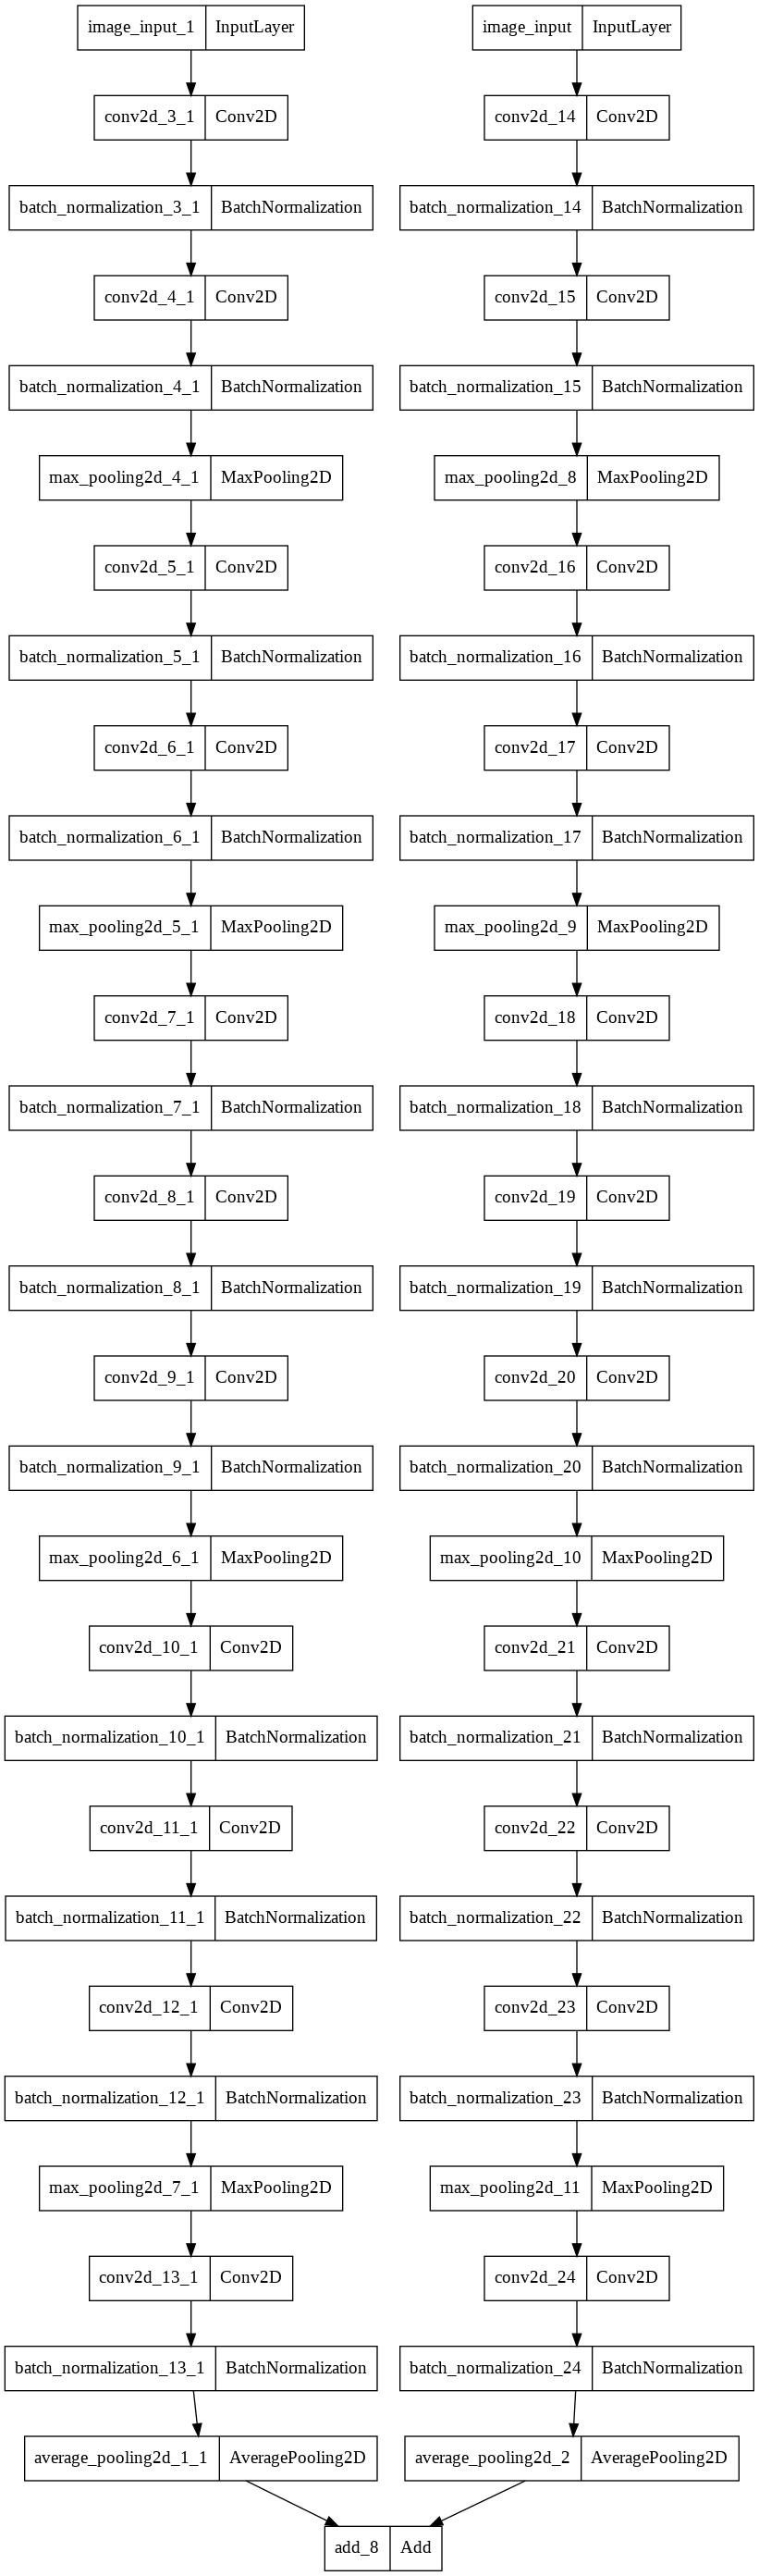

In [33]:
tf.keras.utils.plot_model(
    m1,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)


In [34]:
x = act_model1.layers[len(act_model1.layers)-4](m1.output)

for i in range(len(act_model1.layers)-3, len(act_model1.layers)):
    layer = act_model1.layers[i]
    x = layer(x)
    print(layer.name)

final_model = Model(m1.inputs, x)
final_model.summary()

LSTM_1_1
LSTM_2_1
dense_1
Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input_1 (InputLayer)     [(None, 64, 755, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 image_input (InputLayer)       [(None, 32, 379, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3_1 (Conv2D)            (None, 64, 755, 64)  1792        ['image_input_1[0][0]']          
                                                                  

In [35]:
def createModelPararel(act_model, modelname, optimizetype, lr=0.001):
    inputs = act_model.input
    outputs = act_model.output

    #act_model.summary()
    labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')
    input_length = Input(name='input_length', shape=[1], dtype='int64')
    label_length = Input(name='label_length', shape=[1], dtype='int64')

    def ctc_lambda_func(args):
        y_pred, labels, input_length, label_length = args
        return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
    
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])
    model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

    # model to be used at training time
    model = Model(inputs=[inputs, labels, input_length,
                        label_length], outputs=loss_out)
    if scale == 'S':
        lr = 0.001

    def get_lr_metric(optimizer):
        def lr(y_true, y_pred):
            return optimizer.lr
        return lr

    if optimizetype == "SGD":
        optimizer = SGD(learning_rate=lr, momentum=0.9, decay = 0.0001)
    elif optimizetype == "Adam":
        optimizer = Adam(learning_rate=lr)
    elif optimizetype == "RMSprop":
        optimizer = RMSprop(learning_rate=lr)
    lr_metric = get_lr_metric(optimizer)
    
    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred},  metrics=['accuracy', lr_metric], optimizer = optimizer)
    return model, act_model

In [36]:
modelf, act_modelf = createModelPararel(final_model, "pararell", 'Adam')
modelf.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input_1 (InputLayer)     [(None, 64, 755, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 image_input (InputLayer)       [(None, 32, 379, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_3_1 (Conv2D)            (None, 64, 755, 64)  1792        ['image_input_1[0][0]']          
                                                                                           

In [ ]:
def construct_training_p(Xs, ys, indexs, input_shape, ch=1):
    images = []
    encode_padded_texts = []
    input_lengths = []
    max_lengths = []
    for ind in indexs:
        x = transform.resize(Xs[ind], (input_shape[0], input_shape[1]))
        if ch == 3:
            n_x = np.zeros((x.shape[0], x.shape[1], 3))
            x = x.reshape((x.shape[0], x.shape[1], x.shape[2]))
            #x = color.rgb2gray(x)
            n_x[:, :, 0] = x[:, :, 0]
            n_x[:, :, 1] = x[:, :, 1]
            n_x[:, :, 2] = x[:, :, 2]
            x = n_x
        images.append(n_x)
        encode_padded_texts.append(encode_to_labels(ys[ind], char_list))
        input_lengths.append(max_label_len)
        max_lengths.append(len(ys[ind]))
  
        #print(len(ys[ind]) , max_label_len)

    padded_texts = pad_sequences(encode_padded_texts, maxlen=max_label_len, padding='post', value=len(char_list))
    x1 = np.array(images)
    return [x1, x1, padded_texts, np.array(input_lengths), np.array(max_lengths)]

In [ ]:
train_groups = construct_training_p(Xs, texts, X_train_index, (16,16,3), ch=3)
val_groups = construct_training_p(Xs, texts, X_val_index, (16,16,3), ch=3)

_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_


In [ ]:
train_groups[0] = Xs2[X_train_index]
train_groups[1] = Xs32[X_train_index]
val_groups[0] = Xs2[X_val_index]
val_groups[1] = Xs32[X_val_index]
val_groups[1].shape, val_groups[0].shape

((423, 32, 379, 3), (423, 64, 755, 3))

In [ ]:
checkpoint = ModelCheckpoint(filepath='drive/MyDrive/ICIC/02 Subtitle/Models/vgg64_vgg32_ODS.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

modelf.fit(  x= train_groups, y=np.zeros(len(X_train_index)), batch_size=batch_size, epochs=epochs,
          validation_data=(val_groups, [np.zeros(len(X_val_index))]), verbose=1, callbacks=[checkpoint])

Epoch 1/100
93/93 [==============================] - ETA: 0s - loss: 1.1249 - accuracy: 0.6720 - lr: 0.0010
Epoch 00001: val_loss improved from inf to 10.16857, saving model to drive/MyDrive/ICIC/02 Subtitle/Models/vgg64_vgg32_ODS.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


93/93 [==============================] - 77s 529ms/step - loss: 1.1249 - accuracy: 0.6720 - lr: 0.0010 - val_loss: 10.1686 - val_accuracy: 0.3948 - val_lr: 0.0010
Epoch 2/100
93/93 [==============================] - ETA: 0s - loss: 0.7811 - accuracy: 0.7426 - lr: 0.0010
Epoch 00002: val_loss did not improve from 10.16857
93/93 [==============================] - 41s 433ms/step - loss: 0.7811 - accuracy: 0.7426 - lr: 0.0010 - val_loss: 10.7327 - val_accuracy: 0.4326 - val_lr: 0.0010
Epoch 3/100
93/93 [==============================] - ETA: 0s - loss: 0.8349 - accuracy: 0.7558 - lr: 0.0010
Epoch 00003: val_loss did not improve from 10.16857
93/93 [==============================] - 40s 430ms/step - loss: 0.8349 - accuracy: 0.7558 - lr: 0.0010 - val_loss: 10.2021 - val_accuracy: 0.4137 - val_lr: 0.0010
Epoch 4/100
93/93 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.7305 - lr: 0.0010
Epoch 00004: val_loss improved from 10.16857 to 9.86675, saving model to drive/MyDr

In [ ]:
import gc
train_groups = None
gc.collect()

2089

In [37]:
modelf.load_weights(model_path+'vgg64_vgg32.h5')

In [38]:
from skimage import io
import time

def predict_text(input_code):
    result = ''
    for p in input_code:
        if int(p) != -1:
            result += char_list[int(p)]
    return result

def levenshtein(u, v):
    prev = None
    curr = [0] + list(range(1, len(v) + 1))
    #print(curr)
    # Operations: (SUB, DEL, INS)
    prev_ops = None
    curr_ops = [(0, 0, i) for i in range(len(v) + 1)]
    for x in range(1, len(u) + 1):
        prev, curr = curr, [x] + ([None] * len(v))
        prev_ops, curr_ops = curr_ops, [(0, x, 0)] + ([None] * len(v))
        for y in range(1, len(v) + 1):
            delcost = prev[y] + 1
            addcost = curr[y - 1] + 1
            subcost = prev[y - 1] + int(u[x - 1] != v[y - 1])
            curr[y] = min(subcost, delcost, addcost)
            if curr[y] == subcost:
                (n_s, n_d, n_i) = prev_ops[y - 1]
                curr_ops[y] = (n_s + int(u[x - 1] != v[y - 1]), n_d, n_i)
            elif curr[y] == delcost:
                (n_s, n_d, n_i) = prev_ops[y]
                curr_ops[y] = (n_s, n_d + 1, n_i)
            else:
                (n_s, n_d, n_i) = curr_ops[y - 1]
                curr_ops[y] = (n_s, n_d, n_i + 1)
    return curr[len(v)], curr_ops[len(v)]


def evaluate_model(filepath_best):
    act_model.load_weights(filepath_best)
    print("Model:", filepath_best)
    start = time.time()
    prediction = act_model.predict(valid_img)

    # use CTC decoder
    out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                                greedy=True)[0][0])

    for x in out:
        result = predict_text(x)
    end = time.time()

    n = 0
    total_rate = 0
    c = 0
    ss = 0
    dd = 0
    ii = 0
    sum_wer = 0
    for x in out:
        text = valid_orig_txt[c]
        result = predict_text(x)
        _, (s, d, i)= levenshtein(list(result), list(text))
        ss += s
        dd += d
        ii += i
        n+=len(text)
        c += 1
        wer = (s + d + i)/len(text)
        sum_wer += wer
        #print( round(wer, 2)  , text, result)

    print("Prediction Time",(end-start)/len(valid_img))
    print('CER=',(ii+dd+ss)/n, sum_wer/len(out))
    print('i=',ii,'s=',ss,'d=',dd,'n=',n)

In [39]:
test_groups = construct_training(Xs2, texts, X_test_index, (16, 16, 3), ch=3)
valid_img2 = test_groups[0]*ranged

valid_img64 = Xs2[X_test_index]
valid_img32 = Xs32[X_test_index]
valid_orig_txt = np.array(texts)[X_test_index]

_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_


In [40]:
prediction = act_modelf.predict([valid_img64, valid_img32])
#prediction = act_model2.predict(valid_img2)

# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                            greedy=True)[0][0])

for x in out:
    result = predict_text(x)
end = time.time()

n = 0
total_rate = 0
c = 0
ss = 0
dd = 0
ii = 0
sum_wer = 0
for x in out:
    text = valid_orig_txt[c]
    result = predict_text(x)
    _, (s, d, i)= levenshtein(list(result), list(text))
    ss += s
    dd += d
    ii += i
    n+=len(text)
    c += 1
    wer = (s + d + i)/len(text)
    sum_wer += wer
    print( round(wer, 2)  , text, result)

#print("Prediction Time",(end-start)/len(valid_img))
print('CER=',(ii+dd+ss)/n, sum_wer/len(out))
print('i=',ii,'s=',ss,'d=',dd,'n=',n)

2.83 ไก่สับ จานละ ป้ายเนี่ย ยังได้รับการสนับสนุนนะครับ สิริ
0.0 ไม่น่าใช่โจรธรรมดา ไม่น่าใช่โจรธรรมดา
0.19 เขาอ้างอย่างนั้น เขาอ้างกันอย่างนั้น
0.12 EMPTY YPUR MIND, EMPT Y YOUR MIND,
0.09 คลื่นวิทยุ FM97.5 ร่วมด้วยช่วยกัน คลื่นวิทยุ FM9่7 5 ร่วมด้วยช่วยกัน 
0.0 JUST FOR WHAT JUST FOR WHAT
0.07 Don_t get far away by my side Dont get far away by my side 
0.0 สุดท้าย สุดท้าย
0.02 แวนซ์ และ ฮาร์ดี เชื่อว่าคนบังคับเครื่องบิน MH370 แวนซ์ และ ฮาร์ดี เชื่อว่า คนบังคับเครื่องบิน MH370
0.0 อร่อยเลยอะ อร่อยเลยอะ
0.05 สนับสนุนโดย TOT Fiber สนับสนุนโดย ToT Fiber
0.0 อยากให้ผู้กว้างขวางนี้ไปพิสูจน์ความจริง อยากให้ผู้กว้างขวางนี้ไปพิสูจน์ความจริง
0.0 จีน ไทย เกาหลีใต้ ญี่ปุ่น ไต้หวัน ฮ่องกง มาเก๊า อเมริกา เวียดนาม สิงคโปร์ จีน ไทย เกาหลีใต้ ญี่ปุ่น ไต้หวัน ฮ่องกง มาเก๊า อเมริกา เวียดนาม สิงคโปร์
0.0 อย่าเพิ่งสิวะ อย่าเพิ่งสิวะ
0.0 ปล้นทรัพย์ ฆ่าเจ้าทรัพย์ ฆ่าผู้อื่นโดยเจตนา ปล้นทรัพย์ ฆ่าเจ้าทรัพย์ ฆ่าผู้อื่นโดยเจตนา
0.13 NO,I WILL MEVER NO, I WILL NEVER
0.29 ธันวาคม ินวาคม
0.0 การกักกัน การกักกัน
0

In [41]:
! git clone https://github.com/githubharald/CTCDecoder

Cloning into 'CTCDecoder'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 316 (delta 34), reused 61 (delta 25), pack-reused 245
Receiving objects: 100% (316/316), 1.00 MiB | 5.31 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [42]:
pip install ./CTCDecoder 

Processing ./CTCDecoder
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for ctc-decoder: filename=ctc_decoder-1.0.1-py3-none-any.whl size=11866 sha256=76fcd9e66b918f42e6a7cc21200dbcdc3158bf10f815f3abf1d7f7aa98153540
  Stored in directory: /tmp/pip-ephem-wheel-cache-ibom03y7/wheels/4e/ee/7c/0faf350d7b4acaed32fc891b6213b0821ad14af3dd24a39d68
Successfully built ctc-decoder


In [44]:
import numpy as np
from ctc_decoder import best_path, beam_search

n = 0
total_rate = 0
c = 0
ss = 0
dd = 0
ii = 0
sso = 0
ddo = 0
iio = 0
wer1 = 0
wer2 = 0
sum_wer1 = 0
sum_wer2 = 0
start = time.time()
for x in out:
    text = valid_orig_txt[c]
    result_old = predict_text(x)
    result = beam_search(prediction[c], char_list)
    #tokens = word_tokenize(result, keep_whitespace=False)
    #result_tokens = []
    #for w in tokens:
        

    _, (s, d, i)= levenshtein(list(result), list(text))
    ss += s
    dd += d
    ii += i
    _, (so, do, io)= levenshtein(list(result_old), list(text))
    sso += so
    ddo += do
    iio += io
    n+=len(text)
    c += 1
    wer1 = (s + d + i)/len(text)
    wer2 = (so + do + io)/len(text)
    sum_wer1 += wer1
    sum_wer2 += wer2
    print( c, round(wer1,2), round(wer2,2), text, result, result_old)
end = time.time()
print("Prediction Time",(end-start)/len(valid_img64))
print('WBS CER=',(ii+dd+ss)/n, sum_wer1)
print('Non-WBS CER=',(iio+ddo+sso)/n, sum_wer2)
print('i=',ii,'s=',ss,'d=',dd,'n=',n)

1 2.83 2.83 ไก่สับ จานละ ป้ายเนี่ย ยังได้รับการสนับสนุนนะครับ สิริ ป้ายเนี่ย ยังได้รับการสนับสนุนนะครับ สิริ
2 0.0 0.0 ไม่น่าใช่โจรธรรมดา ไม่น่าใช่โจรธรรมดา ไม่น่าใช่โจรธรรมดา
3 0.19 0.19 เขาอ้างอย่างนั้น เขาอ้างกันอย่างนั้น เขาอ้างกันอย่างนั้น
4 0.12 0.12 EMPTY YPUR MIND, EMPT Y YOUR MIND, EMPT Y YOUR MIND,
5 0.09 0.09 คลื่นวิทยุ FM97.5 ร่วมด้วยช่วยกัน คลื่นวิทยุ FM9่7 5 ร่วมด้วยช่วยกัน  คลื่นวิทยุ FM9่7 5 ร่วมด้วยช่วยกัน 
6 0.0 0.0 JUST FOR WHAT JUST FOR WHAT JUST FOR WHAT
7 0.07 0.07 Don_t get far away by my side Dont get far away by my side  Dont get far away by my side 
8 0.0 0.0 สุดท้าย สุดท้าย สุดท้าย
9 0.02 0.02 แวนซ์ และ ฮาร์ดี เชื่อว่าคนบังคับเครื่องบิน MH370 แวนซ์ และ ฮาร์ดี เชื่อว่า คนบังคับเครื่องบิน MH370 แวนซ์ และ ฮาร์ดี เชื่อว่า คนบังคับเครื่องบิน MH370
10 0.0 0.0 อร่อยเลยอะ อร่อยเลยอะ อร่อยเลยอะ
11 0.05 0.05 สนับสนุนโดย TOT Fiber สนับสนุนโดย ToT Fiber สนับสนุนโดย ToT Fiber
12 0.0 0.0 อยากให้ผู้กว้างขวางนี้ไปพิสูจน์ความจริง อยากให้ผู้กว้างขวางนี้ไปพิสูจน์ความจริง อยากให